In [57]:
#null hypothesis
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
import zipfile
import os
import matplotlib.pyplot as plt
import random
%matplotlib inline 

In [ ]:
# Null  the sample is from from a normal distribution.
# Alternate  the sample is not from from a normal distribution.

In [49]:
# Get Data Online
datestring = '201501'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"
zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  14.0M      0 --:--:-- --:--:-- --:--:-- 24.1M


In [50]:

df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [51]:
#Create age column by subtract birth year column from header
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [52]:
df['age'].dropna(inplace=True)
df['age'].head()

0    55.0
1    52.0
2    41.0
3    46.0
4    38.0
Name: age, dtype: float64

In [53]:
#Create sample size of 200 into an array

array1 = []
array2 = []
while(len(array1) < 200): 
    x = random.randint(0,len(df['age'].values))
    array1.append(df['age'].values[x])
    if x not in array2 : 
        array1.append(df['age'].values[x])
        array2.append(x)
# If you just wanted the first 200 values in the array df[age].values[0-200]

In [54]:
#Create bins for a hexogram
bins = np.arange(15,99,5)


(array([  1.48400000e+03,   1.15280000e+04,   4.46900000e+04,
          5.06830000e+04,   4.04060000e+04,   3.45700000e+04,
          3.32890000e+04,   2.70100000e+04,   1.94420000e+04,
          1.09830000e+04,   3.79600000e+03,   1.47700000e+03,
          3.45000000e+02,   6.90000000e+01,   1.40000000e+01,
          1.70000000e+01]),
 array([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]),
 <a list of 16 Patch objects>)

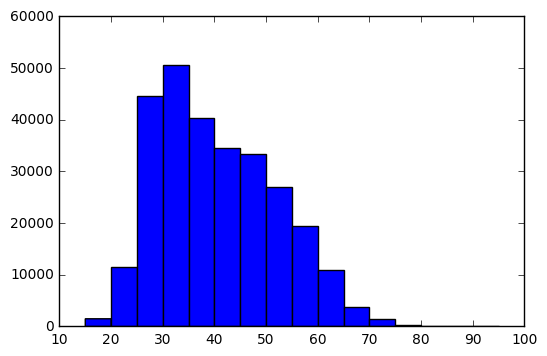

In [13]:
plt.hist(df['age'], bins, histtype = 'bar')

In [59]:
# Ks Test to normal
ks_n = stats.kstest(array2, 'norm', args=(df.age.mean(), df.age.std()))
print ks_n
#p-value is much lower than .05, the Null hypothesis can be rejected.


KstestResult(statistic=1.0, pvalue=0.0)


In [55]:
#p-value is much lower than .05, the Null hypothesis can be rejected.

KstestResult(statistic=0.98999999999999999, pvalue=0.0)

In [45]:
# Ks Test to normal
ks_n = stats.kstest(array2, 'norm', args=(df.age.mean(), df.age.std()))
print ks_n
#p-value is much lower than .05, the Null hypothesis can be rejected.

Power_divergenceResult(statistic=4960345.0678425878, pvalue=0.0)

In [62]:
# KS test to chi squared
scipy.stats.kstest(df['age'].values, 'chi2', args=(df.age.mean(),df.age.std()))

KstestResult(statistic=0.47545108561846439, pvalue=0.0)

In [ ]:
#p-value is much lower than .05, the Null hypothesis can be rejected.

In [63]:
# anderson test to normal
stats.anderson(df.age, dist = 'norm')

AndersonResult(statistic=2732.9753468561685, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [ ]:
# AD-statistic higher than alpha (0.787), reject the null.